# M44 - AD - ESTEFANIA ZAVALA 

En este ejercicio, aplicarás técnicas y conceptos básicos de regresión logística, su ecuación base, y su aplicación a un modelo simple de predicción de ventas.  Además se verán técnicas de entrenamiento, evaluación y visualización de resultados de la regresión logística.

- Importación de un modelo con datos de RRHH (general_data.csv)

In [1]:
import pandas as pd
import numpy as np
import os
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Lectura del archivo
os.chdir('C:/Users/estef/Desktop/data')
df = pd.read_csv('HR-Employee-Attrition.csv')
df.sample(5)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
332,54,No,Travel_Frequently,928,Research & Development,20,4,Life Sciences,1,450,...,4,80,0,20,4,2,4,3,0,3
17,22,No,Non-Travel,1123,Research & Development,16,2,Medical,1,22,...,2,80,2,1,2,2,1,0,0,0
120,30,No,Travel_Frequently,1312,Research & Development,23,3,Life Sciences,1,159,...,3,80,3,10,2,2,10,7,0,9
67,45,No,Travel_Rarely,1339,Research & Development,7,3,Life Sciences,1,86,...,3,80,1,25,2,3,1,0,0,0
1134,35,No,Travel_Rarely,1349,Research & Development,7,2,Life Sciences,1,1601,...,4,80,1,1,5,2,1,0,0,1


- EDA completo siguiendo los modelos anteriores

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

Nota:

Las variables tipo object se cambiarán a category

In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1470.0,36.923810,9.135373,18.0,30.00,36.0,43.00,60.0
DailyRate,1470.0,802.485714,403.509100,102.0,465.00,802.0,1157.00,1499.0
DistanceFromHome,1470.0,9.192517,8.106864,1.0,2.00,7.0,14.00,29.0
Education,1470.0,2.912925,1.024165,1.0,2.00,3.0,4.00,5.0
EmployeeCount,1470.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
EmployeeNumber,1470.0,1024.865306,602.024335,1.0,491.25,1020.5,1555.75,2068.0
EnvironmentSatisfaction,1470.0,2.721769,1.093082,1.0,2.00,3.0,4.00,4.0
HourlyRate,1470.0,65.891156,20.329428,30.0,48.00,66.0,83.75,100.0
JobInvolvement,1470.0,2.729932,0.711561,1.0,2.00,3.0,3.00,4.0
JobLevel,1470.0,2.063946,1.106940,1.0,1.00,2.0,3.00,5.0


In [5]:
df.nunique()

Age                           43
Attrition                      2
BusinessTravel                 3
DailyRate                    886
Department                     3
DistanceFromHome              29
Education                      5
EducationField                 6
EmployeeCount                  1
EmployeeNumber              1470
EnvironmentSatisfaction        4
Gender                         2
HourlyRate                    71
JobInvolvement                 4
JobLevel                       5
JobRole                        9
JobSatisfaction                4
MaritalStatus                  3
MonthlyIncome               1349
MonthlyRate                 1427
NumCompaniesWorked            10
Over18                         1
OverTime                       2
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StandardHours                  1
StockOptionLevel               4
TotalWorkingYears             40
TrainingTimesLastYear          7
WorkLifeBa

In [6]:
df.nunique()[df.nunique() == 1]

EmployeeCount    1
Over18           1
StandardHours    1
dtype: int64

Notas:

Columnas como EmployeeCount, Over18 y StandardHours contienen un solo valor por lo que no aportan nada al modelo y serán eliminadas.

EmployeeNumber tiene un numero diferente por línea por lo que también será eliminada

In [7]:
df.shape

(1470, 35)

In [8]:
df.isnull().sum().sum()

np.int64(0)

In [9]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

Nota: 
No hay valores nulos que imputar


In [10]:
df.select_dtypes(include=['object'])

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
0,Yes,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single,Y,Yes
1,No,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married,Y,No
2,Yes,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single,Y,Yes
3,No,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married,Y,Yes
4,No,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married,Y,No
...,...,...,...,...,...,...,...,...,...
1465,No,Travel_Frequently,Research & Development,Medical,Male,Laboratory Technician,Married,Y,No
1466,No,Travel_Rarely,Research & Development,Medical,Male,Healthcare Representative,Married,Y,No
1467,No,Travel_Rarely,Research & Development,Life Sciences,Male,Manufacturing Director,Married,Y,Yes
1468,No,Travel_Frequently,Sales,Medical,Male,Sales Executive,Married,Y,No


In [11]:
# Generar copia de df original para modificarlo
df2 = df.copy()

In [12]:
# Eliminar columnas no necesarias
df2.drop('EmployeeCount', axis=1, inplace = True)
df2.drop('Over18', axis=1, inplace = True)
df2.drop('StandardHours', axis=1, inplace = True)
df2.drop('EmployeeNumber', axis=1, inplace = True)

#Se aprecia alta correlacion entre JobLevel y MonthlyIncom por lo que se elimina también MonthlyIncom
df2.drop('MonthlyIncome', axis=1, inplace = True)


In [13]:
# Obtener valores distintos por columna y su representación en el df
print(df2['Attrition'].value_counts())
print('')
print(df2['BusinessTravel'].value_counts())
print('')
print(df2['Department'].value_counts())
print('')
print(df2['EducationField'].value_counts())


Attrition
No     1233
Yes     237
Name: count, dtype: int64

BusinessTravel
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: count, dtype: int64

Department
Research & Development    961
Sales                     446
Human Resources            63
Name: count, dtype: int64

EducationField
Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: count, dtype: int64


In [14]:
print(df2['Gender'].value_counts())
print('')
print(df2['JobRole'].value_counts())
print('')
print(df2['MaritalStatus'].value_counts())
print('')
print(df2['OverTime'].value_counts())


Gender
Male      882
Female    588
Name: count, dtype: int64

JobRole
Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
Name: count, dtype: int64

MaritalStatus
Married     673
Single      470
Divorced    327
Name: count, dtype: int64

OverTime
No     1054
Yes     416
Name: count, dtype: int64


Nota: No se considera que alguna categoría tenga tan poca representación como para eliminarla

In [15]:
#Category codes
#Transformar variables tipo object en tipo category y asignarles valores numéricos
df2.Attrition = df2.Attrition.astype('category').cat.codes
df2.BusinessTravel = df2.BusinessTravel.astype('category').cat.codes
df2.Department = df2.Department.astype('category').cat.codes
df2.EducationField = df2.EducationField.astype('category').cat.codes
df2.Gender = df2.Gender.astype('category').cat.codes
df2.JobRole = df2.JobRole.astype('category').cat.codes
df2.MaritalStatus = df2.MaritalStatus.astype('category').cat.codes
df2.OverTime = df2.OverTime.astype('category').cat.codes

In [16]:
df2.sample(10)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
354,30,0,0,641,2,25,2,5,4,0,...,3,2,1,4,2,4,2,2,2,2
842,28,1,2,1485,1,12,1,1,3,0,...,3,4,0,1,4,2,1,1,0,0
326,39,0,1,672,1,7,2,3,3,1,...,3,1,1,21,2,3,21,9,13,3
1076,54,0,1,1050,1,11,4,3,2,0,...,4,1,1,26,2,3,14,9,1,12
947,52,1,2,1030,2,5,3,1,2,1,...,3,3,0,10,2,2,8,7,7,7
1309,26,0,2,572,2,10,3,3,3,1,...,3,1,0,5,4,3,5,3,1,2
907,44,0,2,1099,2,5,3,2,2,1,...,3,3,1,26,5,3,22,9,3,10
856,20,0,2,805,1,3,3,1,1,1,...,3,1,0,2,2,2,2,2,1,2
403,41,0,2,645,2,1,3,2,2,1,...,3,3,1,10,2,3,10,7,0,7
1401,55,0,2,189,0,26,4,0,3,1,...,3,1,1,35,0,3,10,9,1,4


In [17]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 30 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   Age                       1470 non-null   int64
 1   Attrition                 1470 non-null   int8 
 2   BusinessTravel            1470 non-null   int8 
 3   DailyRate                 1470 non-null   int64
 4   Department                1470 non-null   int8 
 5   DistanceFromHome          1470 non-null   int64
 6   Education                 1470 non-null   int64
 7   EducationField            1470 non-null   int8 
 8   EnvironmentSatisfaction   1470 non-null   int64
 9   Gender                    1470 non-null   int8 
 10  HourlyRate                1470 non-null   int64
 11  JobInvolvement            1470 non-null   int64
 12  JobLevel                  1470 non-null   int64
 13  JobRole                   1470 non-null   int8 
 14  JobSatisfaction           1470 non-null 

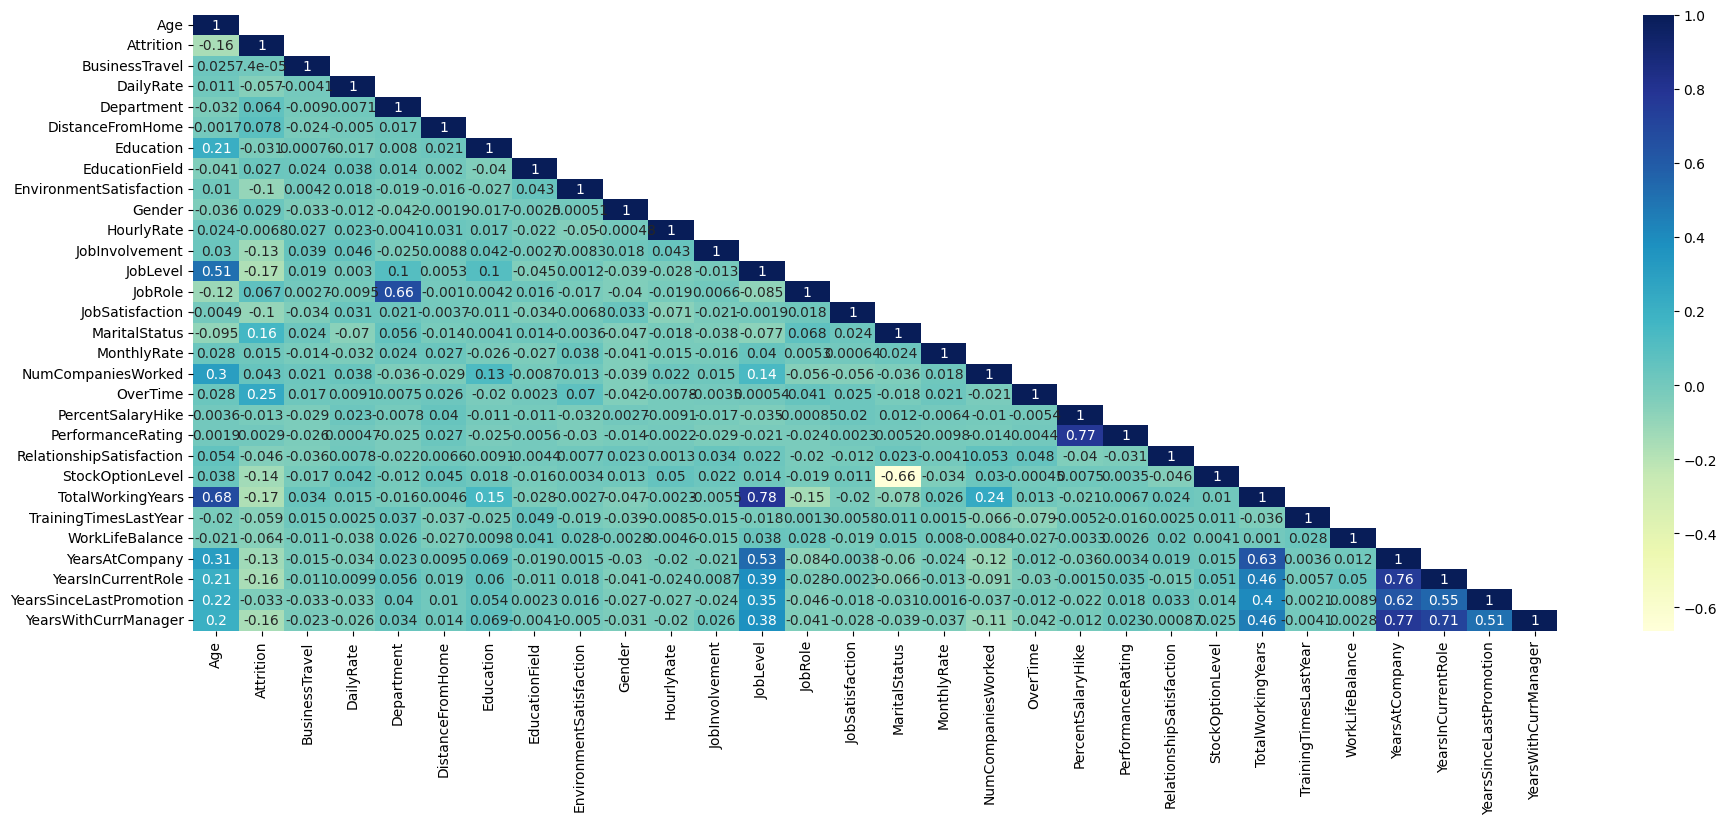

In [18]:
plt.figure(figsize = (22,8))
corr_df2 = corr = df2.corr(method = 'pearson')
df2_lt = corr_df2.where(np.tril(np.ones(corr_df2.shape)).astype(bool))
hmap = sns.heatmap(df2_lt, cmap='YlGnBu', annot = True)

Nota: aqui se apreció alta correlacion entre JobLevel y MonthlyIncom por lo que se eliminó también MonthlyIncom

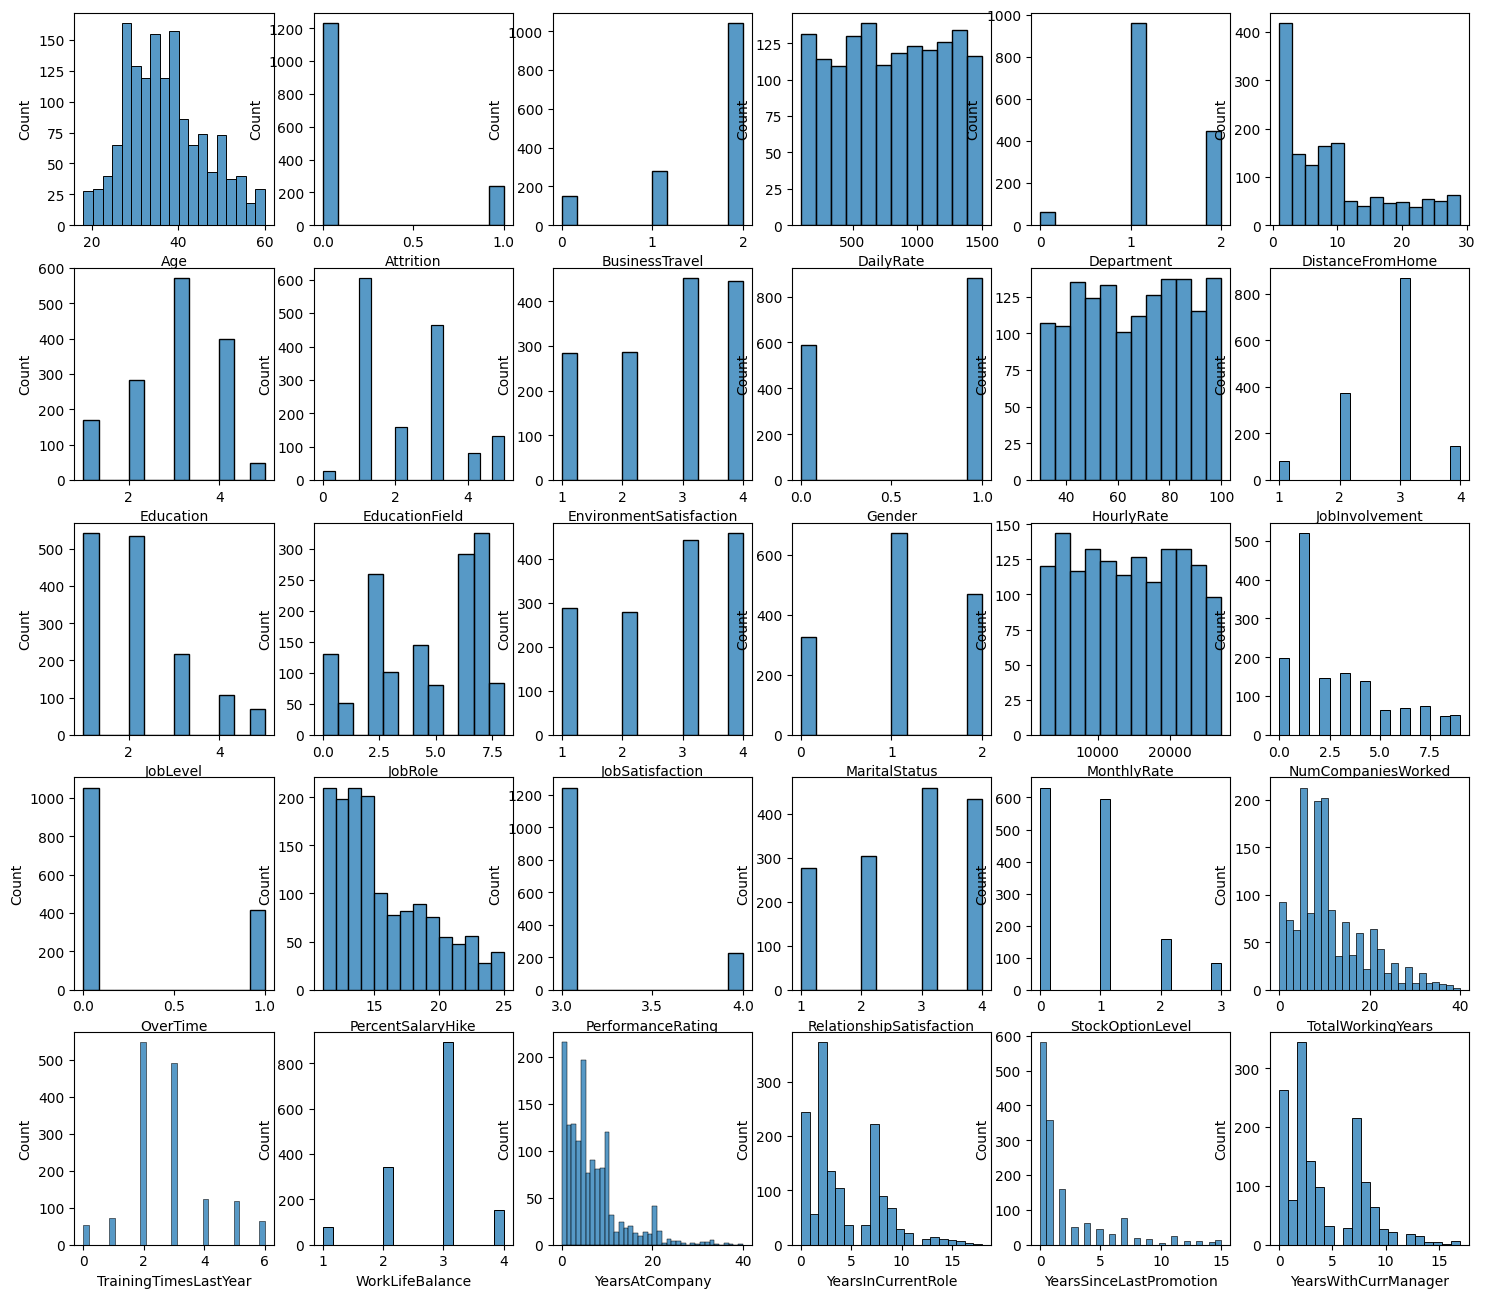

In [20]:
fig, axes = plt.subplots(nrows=5, ncols=6, figsize=(18,16))
for i, column in enumerate(df2):
    sns.histplot(df2[column],ax=axes[i//6, i%6], kde=False)

Nota: Aqui se aprecian algunas variables con sesgo marcado por lo que se tratarán como variables logaritmicas

In [21]:
df2['YearsAtCompany'] = np.log(df2['YearsAtCompany']+1)
df2['YearsSinceLastPromotion'] = np.log(df2['YearsSinceLastPromotion']+1)

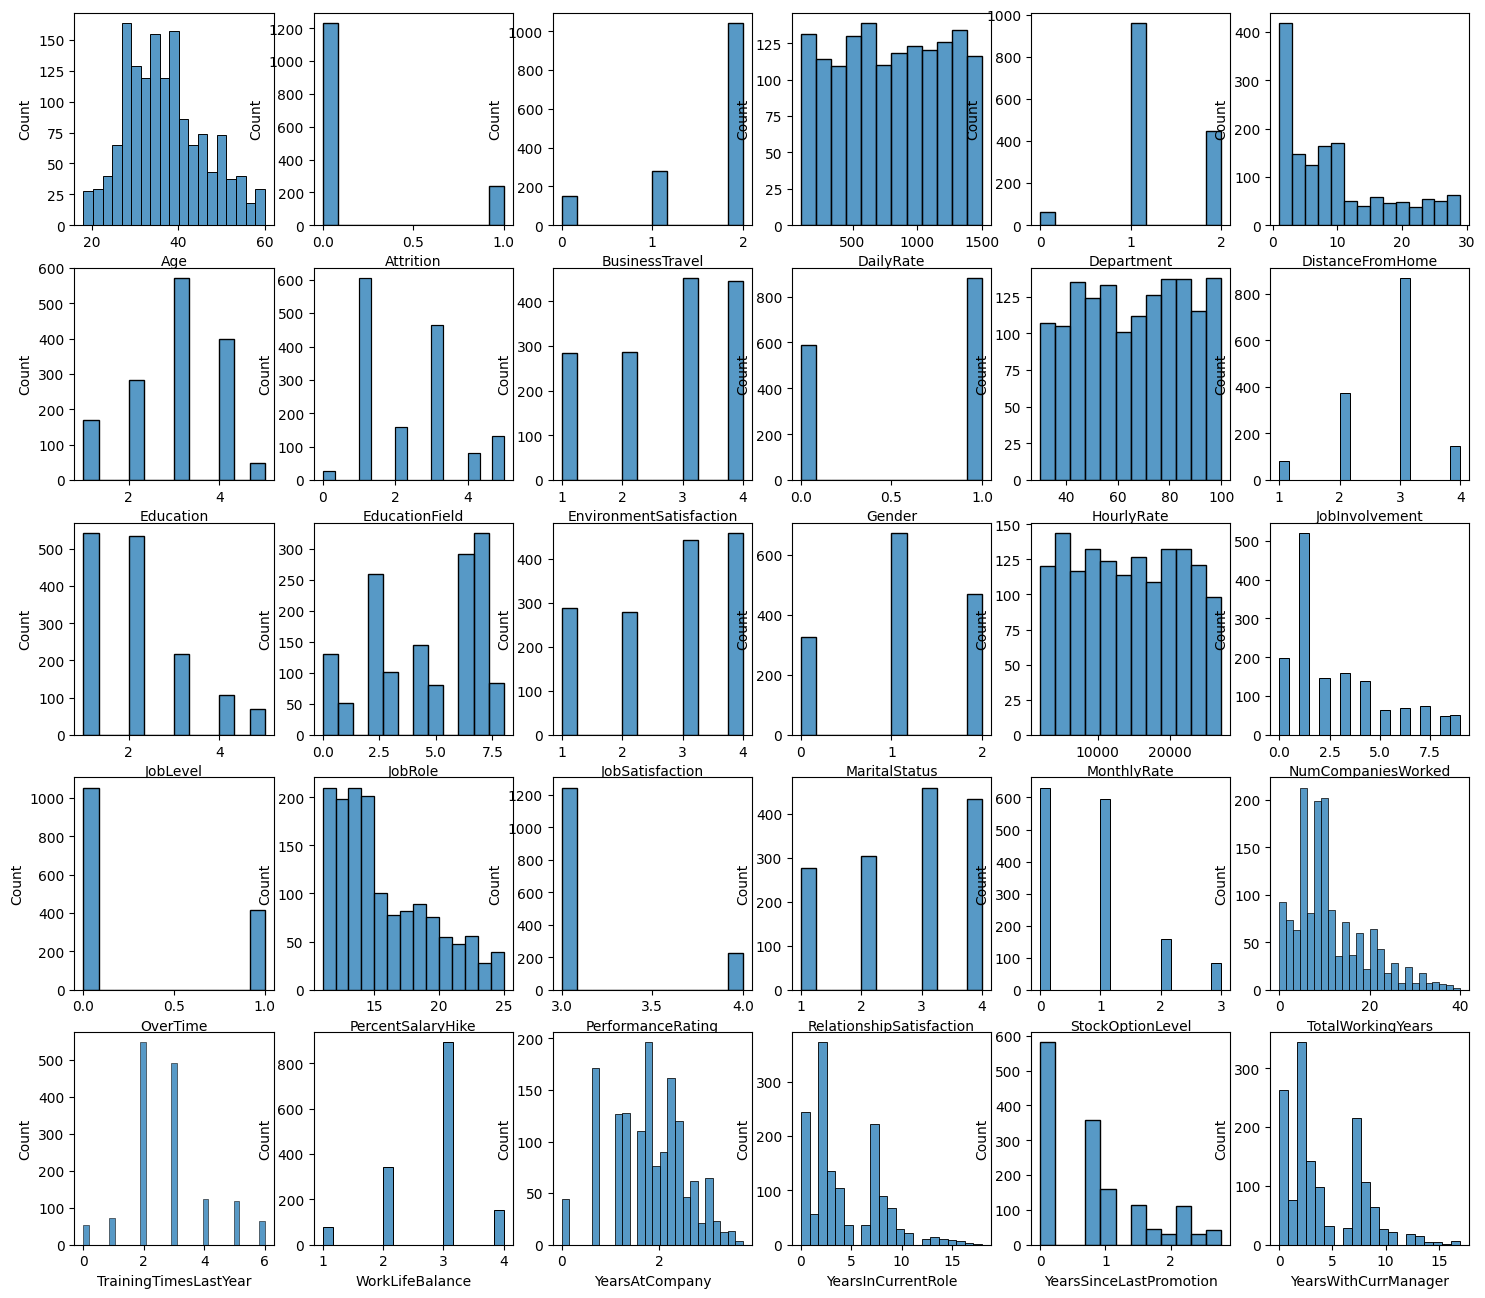

In [23]:
fig, axes = plt.subplots(nrows=5, ncols=6, figsize=(18,16))
for i, column in enumerate(df2):
    sns.histplot(df2[column],ax=axes[i//6, i%6], kde=False)

In [25]:
df2.groupby(['YearsAtCompany']).mean().T

YearsAtCompany,0.000000,0.693147,1.098612,1.386294,1.609438,1.791759,1.945910,2.079442,2.197225,2.302585,...,3.332205,3.401197,3.433987,3.465736,3.496508,3.526361,3.555348,3.610918,3.637586,3.713572
Age,31.227273,35.058480,34.708661,35.125000,36.572727,36.862245,35.447368,35.988889,36.987500,39.048780,...,50.000000,55.500000,50.000000,52.333333,50.666667,52.600000,52.000000,55.000000,58.000000,58.000000
Attrition,0.363636,0.345029,0.212598,0.156250,0.172727,0.107143,0.118421,0.122222,0.112500,0.097561,...,0.000000,0.000000,0.000000,0.333333,0.333333,0.200000,0.000000,0.000000,0.000000,1.000000
BusinessTravel,1.431818,1.643275,1.669291,1.593750,1.627273,1.653061,1.565789,1.688889,1.587500,1.426829,...,2.000000,1.500000,1.000000,1.333333,1.333333,1.200000,2.000000,2.000000,2.000000,2.000000
DailyRate,770.659091,781.339181,810.543307,821.421875,814.909091,822.443878,825.592105,823.533333,814.262500,747.756098,...,1044.000000,329.500000,1234.000000,804.000000,615.000000,604.800000,621.000000,568.500000,682.000000,147.000000
Department,1.386364,1.228070,1.267717,1.210938,1.209091,1.224490,1.236842,1.277778,1.300000,1.317073,...,1.000000,1.500000,1.000000,1.000000,1.000000,1.000000,2.000000,1.500000,2.000000,1.000000
DistanceFromHome,8.477273,9.432749,8.866142,8.046875,9.063636,9.515306,8.986842,9.133333,9.300000,9.756098,...,18.000000,8.000000,20.000000,7.333333,9.000000,3.600000,3.000000,13.500000,10.000000,23.000000
Education,2.840909,2.847953,2.826772,2.984375,2.718182,2.877551,2.802632,2.944444,3.037500,2.963415,...,3.000000,3.000000,5.000000,4.000000,3.000000,3.400000,4.000000,4.000000,4.000000,4.000000
EducationField,2.318182,2.099415,2.299213,2.140625,2.336364,2.336735,2.565789,2.222222,2.400000,2.243902,...,2.000000,1.000000,3.000000,1.000000,2.666667,2.200000,2.000000,2.500000,3.000000,3.000000
EnvironmentSatisfaction,2.795455,2.690058,2.645669,2.625000,2.709091,2.750000,2.750000,2.977778,2.762500,2.804878,...,2.000000,2.500000,2.000000,3.000000,1.666667,2.800000,3.000000,3.500000,4.000000,4.000000
Gender,0.659091,0.625731,0.653543,0.562500,0.681818,0.556122,0.618421,0.600000,0.537500,0.560976,...,0.500000,0.500000,1.000000,1.000000,0.666667,0.800000,1.000000,1.000000,1.000000,0.000000


In [26]:
df2.groupby(['JobLevel']).mean().T

JobLevel,1,2,3,4,5
Age,32.524862,36.599251,40.087156,47.537736,47.753623
Attrition,0.263352,0.097378,0.146789,0.047170,0.072464
BusinessTravel,1.631676,1.554307,1.633028,1.613208,1.739130
DailyRate,803.848987,793.853933,829.761468,774.452830,815.449275
Department,1.079190,1.425094,1.353211,1.283019,1.086957
DistanceFromHome,8.631676,9.683521,9.770642,10.226415,6.391304
Education,2.751381,2.985019,3.013761,3.122642,2.985507
EducationField,2.329650,2.191011,2.311927,2.075472,2.101449
EnvironmentSatisfaction,2.718232,2.739700,2.660550,2.754717,2.753623
Gender,0.633517,0.588015,0.568807,0.518868,0.652174


- Aplicación de modelo de regresión logística a la variable Attrition

In [27]:
from sklearn.model_selection import train_test_split

X = df2.drop('Attrition',axis=1)
y = df2['Attrition']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 1)

- Entrenamiento, evaluación y predicción de los resultados del modelo

In [28]:
X.head(10)

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,2,1102,2,1,2,1,2,0,94,...,3,1,0,8,0,1,1.945910,4,0.000000,5
1,49,1,279,1,8,1,1,3,1,61,...,4,4,1,10,3,3,2.397895,7,0.693147,7
2,37,2,1373,1,2,2,4,4,1,92,...,3,2,0,7,3,3,0.000000,0,0.000000,0
3,33,1,1392,1,3,4,1,4,0,56,...,3,3,0,8,3,3,2.197225,7,1.386294,0
4,27,2,591,1,2,1,3,1,1,40,...,3,4,1,6,3,3,1.098612,2,1.098612,2
5,32,1,1005,1,2,2,1,4,1,79,...,3,3,0,8,2,2,2.079442,7,1.386294,6
6,59,2,1324,1,3,3,3,3,0,81,...,4,1,3,12,3,2,0.693147,0,0.000000,0
7,30,2,1358,1,24,1,1,4,1,67,...,4,2,1,1,2,3,0.693147,0,0.000000,0
8,38,1,216,1,23,3,1,4,1,44,...,4,2,0,10,2,3,2.302585,7,0.693147,8
9,36,2,1299,1,27,3,3,3,1,94,...,3,2,2,17,3,2,2.079442,7,2.079442,7


In [29]:
y.head(10)

0    1
1    0
2    1
3    0
4    0
5    0
6    0
7    0
8    0
9    0
Name: Attrition, dtype: int8

In [30]:
print(df2['Attrition'].value_counts())
print(df2['Attrition'].value_counts(normalize = True))

Attrition
0    1233
1     237
Name: count, dtype: int64
Attrition
0    0.838776
1    0.161224
Name: proportion, dtype: float64


In [39]:
from sklearn import metrics
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(solver = 'liblinear')
model.fit(X_train, y_train)

y_predict = model.predict(X_test)

In [40]:
y_predict[0:200]

array([0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1], dtype=int8)

- Análisis de Sensibilidad e importancia de variables
- Visualización de los resultados del modelo de clasificación

In [41]:
z = X_test.copy()
z['Attrition real'] = y_predict
z['Attrition prediction'] = y_predict
z[['Attrition real', 'Attrition prediction']].head(20)

,Attrition real,Attrition prediction
1291,0,0
1153,1,1
720,1,1
763,0,0
976,0,0
724,0,0
314,0,0
258,0,0
442,0,0
1393,0,0


In [42]:
coef_df = pd.DataFrame(model.coef_)
coef_df.columns = X.columns
coef_df['intercept'] = model.intercept_
coef_df.T

,0
Age,-0.027557
BusinessTravel,0.167364
DailyRate,-0.000417
Department,0.417396
DistanceFromHome,0.042545
Education,0.107479
EducationField,0.069436
EnvironmentSatisfaction,-0.305567
Gender,0.351013
HourlyRate,0.002720


- Matriz de Confusión y medidas del modelo

Text(0.5, 1.0, 'Matriz de Confusión')

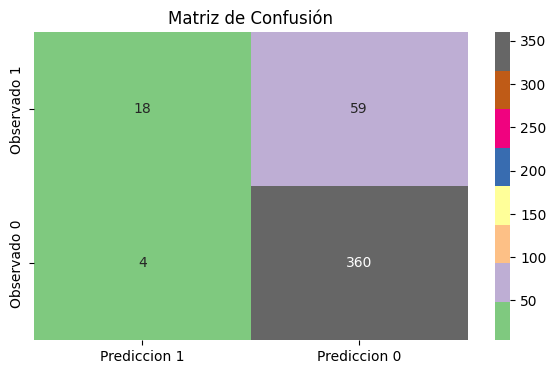

In [43]:
cm=metrics.confusion_matrix(y_test,y_predict,labels=[1,0])

df_cm = pd.DataFrame(cm, index=[i for i in ['Observado 1','Observado 0']],
                     columns = [i for i in ['Prediccion 1','Prediccion 0']])

plt.figure(figsize = (7,4))
sns.heatmap(df_cm, annot=True,cmap='Accent',fmt='d').set_title('Matriz de Confusión')

In [44]:
TP = df_cm.iloc[0][0]
FP = df_cm.iloc[0][1]
FN = df_cm.iloc[1][0]
TN = df_cm.iloc[1][1]

C:\Users\estef\AppData\Local\Temp\ipykernel_19612\2489800096.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  TP = df_cm.iloc[0][0]
C:\Users\estef\AppData\Local\Temp\ipykernel_19612\2489800096.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  FP = df_cm.iloc[0][1]
C:\Users\estef\AppData\Local\Temp\ipykernel_19612\2489800096.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  FN = df_cm.iloc[1][0]
C:\Users\estef\AppData\Local\Te

In [45]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score, classification_report, confusion_matrix

y_pred = model.predict(X_test)
model_score = accuracy_score(y_test,y_pred)
recall_score = recall_score(y_test, y_pred)
precision_score = precision_score(y_test,y_pred)
f1_score = f1_score(y_test, y_pred)

print('Medidas del Modelo')
print('Accuracy = {0:0.2f}'.format(model_score))
print('Precision = {0:0.2f}'.format(precision_score))
print('Recall = {0:0.2f}'.format(recall_score))
print('F1 Score = {0:0.2f}'.format(f1_score))
print('Roc Auc Score = {0:0.2f}'.format(roc_auc_score(y_test,y_pred)))

Medidas del Modelo
Accuracy = 0.86
Precision = 0.82
Recall = 0.23
F1 Score = 0.36
Roc Auc Score = 0.61
